In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# iris 데이터는 setosa, versicolor, virginica가 50개씩 들어있는 csv 파일임
# 여기서는 두개의 클래스만 뽑아볼 예정

import matplotlib.pyplot as plt
import numpy as np

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y =='Iris-setosa', -1, 1) ## setosa면 -1, versicolor면 1 클래스 부여

X = df.iloc[0:100, [0,2]].values ## X값에는 꽃받침 길이와 꽃잎 길이를 담음

<function matplotlib.pyplot.show(*args, **kw)>

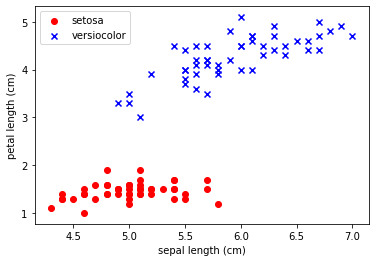

In [5]:
## 산점도 그리기
plt.scatter(X[:50, 0], X[:50, 1],
           color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker = 'x', label = 'versiocolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc = 'upper left')
plt.show

In [37]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta ## eta : 학습률 (0~1 사이 값)
        self.n_iter = n_iter ## n_iter : 훈련 데이터셋 반복 횟수
        self.random_state = random_state ## random_state : 난수 생성기 시드
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) ## 로컬에서는 시드가 같으면 같은 난수를 생성해줌
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, 
                             size = 1 + X.shape[1]) ## w_ : 학습된 가중치
        self.errors_ = [] ## errors_ : epoch마다 누적된 오류
        
        for _ in range(self.n_iter):
            errors = 0
            for x_i, target in zip(X,y): ## zip: 동일한 개수의 list 를 묶어줌
                update = self.eta * (target - self.predict(x_i))
                self.w_[1:] += update * x_i
                self.w_[0] += update * 1 ## x_0은 1과 동일
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
                
                
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.00, 1, -1)
                

In [38]:
ppn = Perceptron(eta = 0.1 , n_iter = 10)

In [39]:
ppn.fit(X, y)

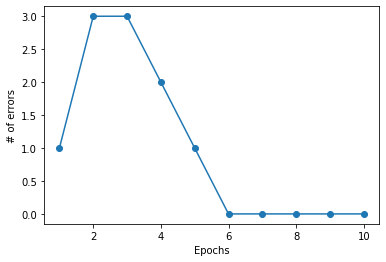

In [43]:
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('# of errors')
plt.show()

In [46]:
## 데이터셋 결정경계 시각화
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    ## 시각화 모양, 색 결정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    ## 결정 경계 정의
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    ## 산점도 함수
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

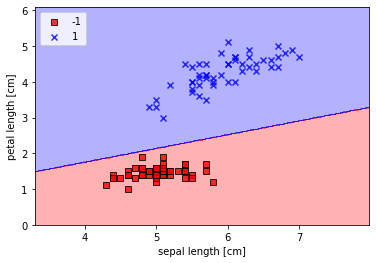

In [47]:
## iris 데이터 산점도

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()